In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    PowerTransformer,
    FunctionTransformer
)

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)

In [20]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

In [5]:
# variable information
print(default_of_credit_card_clients.variables)

   name     role     type      demographic                 description units  \
0    ID       ID  Integer             None                        None  None   
1    X1  Feature  Integer             None                   LIMIT_BAL  None   
2    X2  Feature  Integer              Sex                         SEX  None   
3    X3  Feature  Integer  Education Level                   EDUCATION  None   
4    X4  Feature  Integer   Marital Status                    MARRIAGE  None   
5    X5  Feature  Integer              Age                         AGE  None   
6    X6  Feature  Integer             None                       PAY_0  None   
7    X7  Feature  Integer             None                       PAY_2  None   
8    X8  Feature  Integer             None                       PAY_3  None   
9    X9  Feature  Integer             None                       PAY_4  None   
10  X10  Feature  Integer             None                       PAY_5  None   
11  X11  Feature  Integer             No

In [11]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [16]:
y.head()

,Y
0,1
1,1
2,0
3,0
4,0


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
dtypes: int64(23

In [13]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [38]:
X.nunique()

X1        81
X2         2
X3         7
X4         4
X5        56
X6        11
X7        11
X8        11
X9        11
X10       10
X11       10
X12    22723
X13    22346
X14    22026
X15    21548
X16    21010
X17    20604
X18     7943
X19     7899
X20     7518
X21     6937
X22     6897
X23     6939
dtype: int64

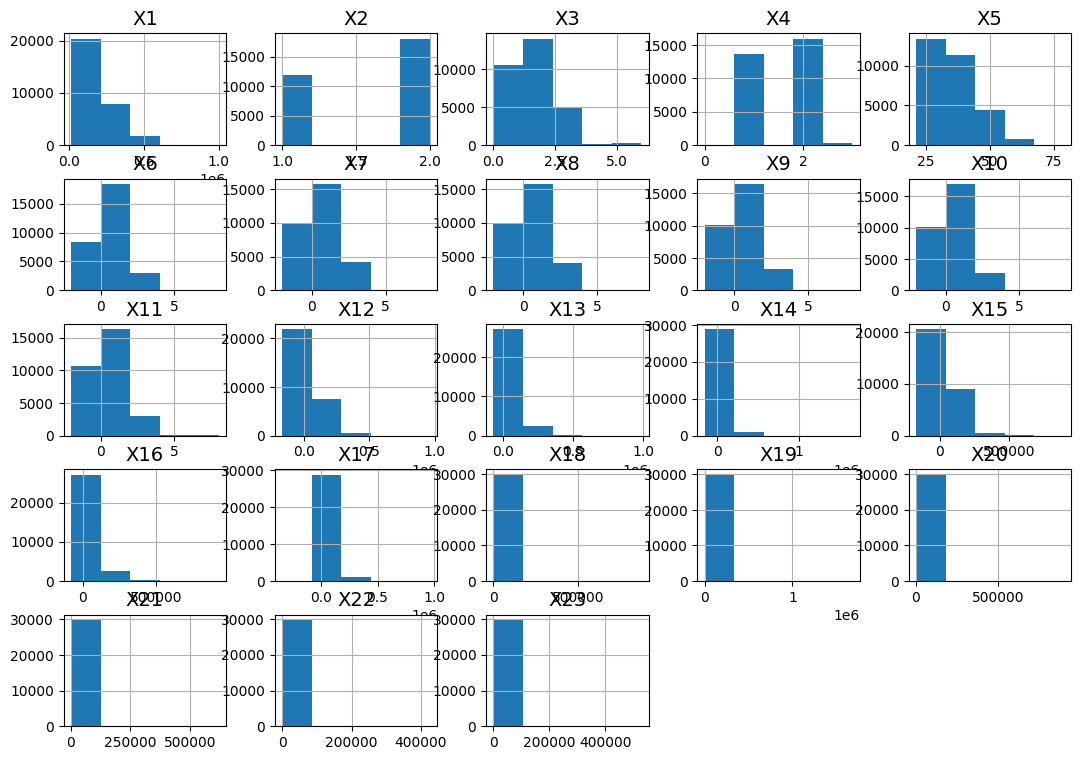

In [43]:
X.hist(bins=5, figsize=(13, 9))
plt.show()

In [34]:
full_data = pd.concat([X, y], axis=1)
full_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
corr_matrix = full_data.corr(numeric_only=True)
corr_matrix["Y"].sort_values(ascending=False)

Y      1.000000
X6     0.324794
X7     0.263551
X8     0.235253
X9     0.216614
X10    0.204149
X11    0.186866
X3     0.028006
X5     0.013890
X17   -0.005372
X16   -0.006760
X15   -0.010156
X14   -0.014076
X13   -0.014193
X12   -0.019644
X4    -0.024339
X2    -0.039961
X23   -0.053183
X22   -0.055124
X20   -0.056250
X21   -0.056827
X19   -0.058579
X18   -0.072929
X1    -0.153520
Name: Y, dtype: float64

In [44]:
# Identify columns for each type of preprocessing

# 1. Skewed continuous features that need transformation and scaling
skewed_features = ['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

# 2. Continuous features that only need scaling
numeric_features = ['X5']

# 3. Categorical features that need one-hot encoding
categorical_features = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

In [47]:
skewed_pipeline = Pipeline(steps=[
    ('power_transform', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('skewed', skewed_pipeline, skewed_features),
        ('numeric', numeric_pipeline, numeric_features),
        ('categorical', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough' # Ensures no columns are accidentally dropped
)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
# Fit the preprocessor on the TRAINING data and transform it
X_train_processed = preprocessor.fit_transform(X_train)

# Use the FITTED preprocessor to transform the TESTING data
X_test_processed = preprocessor.transform(X_test)

array([[<Axes: title={'center': 'skewed__X1'}>,
        <Axes: title={'center': 'skewed__X12'}>,
        <Axes: title={'center': 'skewed__X13'}>,
        <Axes: title={'center': 'skewed__X14'}>],
       [<Axes: title={'center': 'skewed__X15'}>,
        <Axes: title={'center': 'skewed__X16'}>,
        <Axes: title={'center': 'skewed__X17'}>,
        <Axes: title={'center': 'skewed__X18'}>],
       [<Axes: title={'center': 'skewed__X19'}>,
        <Axes: title={'center': 'skewed__X20'}>,
        <Axes: title={'center': 'skewed__X21'}>,
        <Axes: title={'center': 'skewed__X22'}>],
       [<Axes: title={'center': 'skewed__X23'}>,
        <Axes: title={'center': 'numeric__X5'}>, <Axes: >, <Axes: >]],
      dtype=object)

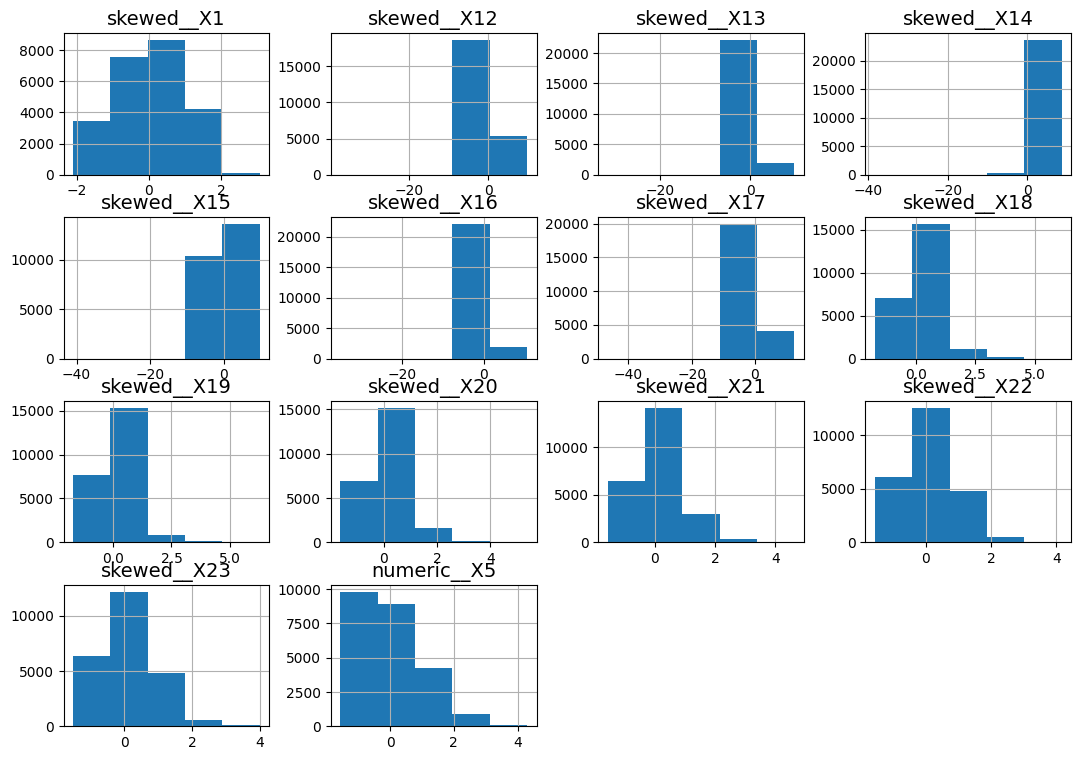

In [60]:
X_train_processed = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out()[:14])
X_train_processed.hist(bins=5, figsize=(13, 9))

In [63]:
# Make Sure It's a 1D Array for Target Variable
y_train_ravel = y_train.values.ravel()
y_test_ravel = y_test.values.ravel()

In [68]:
# Model 1: Logistic Regression (a strong baseline)
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga']
}

# Model 2: Random Forest Classifier (an ensemble of trees)
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2]
}

# Model 3: Gradient Boosting Classifier (another powerful ensemble)
pipe_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}

In [69]:
best_models = {}

searches = [
    ('Logistic Regression', pipe_lr, param_grid_lr),
    ('Random Forest', pipe_rf, param_grid_rf),
    ('Gradient Boosting', pipe_gb, param_grid_gb)
]

print("Starting model search...")
for name, pipe, params in searches:
    print(f"\n----- Searching for best {name} -----")

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=5, # 5-fold cross-validation
        scoring='roc_auc', # Best metric for this problem
        n_jobs=-1,
        verbose=1
    )

    # Fit the grid search to the training data
    gs.fit(X_train, y_train_ravel)

    # Store the best estimator and its score
    best_models[name] = {
        'best_estimator': gs.best_estimator_,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

    print(f"Best ROC AUC score: {gs.best_score_:.4f}")
    print(f"Best parameters: {gs.best_params_}")

print("\n\n--- Model Search Complete ---")
best_overall_model_name = None
best_overall_score = 0

for name, results in best_models.items():
    print(f"Model: {name}, Best ROC AUC: {results['best_score']:.4f}")
    if results['best_score'] > best_overall_score:
        best_overall_score = results['best_score']
        best_overall_model_name = name

print("\n---------------------------------")
print(f"The overall best model is: {best_overall_model_name}")
print(f"With a cross-validated ROC AUC score of: {best_overall_score:.4f}")
print("Best parameters found:")
print(best_models[best_overall_model_name]['best_params'])
print("---------------------------------")

Starting model search...

----- Searching for best Logistic Regression -----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best ROC AUC score: 0.7808
Best parameters: {'classifier__C': 0.1, 'classifier__solver': 'saga'}

----- Searching for best Random Forest -----
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best ROC AUC score: 0.7816
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 200}

----- Searching for best Gradient Boosting -----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best ROC AUC score: 0.7833
Best parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}


--- Model Search Complete ---
Model: Logistic Regression, Best ROC AUC: 0.7808
Model: Random Forest, Best ROC AUC: 0.7816
Model: Gradient Boosting, Best ROC AUC: 0.7833

---------------------------------
The overall best model is: Gradient Boosting
With a cross-va

In [75]:
# Our best model from the previous section
best_model = best_models[best_overall_model_name]['best_estimator']

# Predict the class labels (0 or 1)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [76]:
print("--- Test Set Evaluation ---")

# Print the ROC AUC Score
test_roc_auc = roc_auc_score(y_test_ravel, y_pred_proba)
print(f"Test Set ROC AUC Score: {test_roc_auc:.4f}")
print(f"(Compared to Cross-Validation ROC AUC Score: {best_overall_score:.4f})")
print("\n" + "="*30 + "\n")


# Print the Classification Report
print("Classification Report:")
print(classification_report(y_test_ravel, y_pred, target_names=['No Default', 'Default']))
print("="*30 + "\n")

--- Test Set Evaluation ---
Test Set ROC AUC Score: 0.7780
(Compared to Cross-Validation ROC AUC Score: 0.7833)


Classification Report:
              precision    recall  f1-score   support

  No Default       0.84      0.95      0.89      4673
     Default       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000




Confusion Matrix:


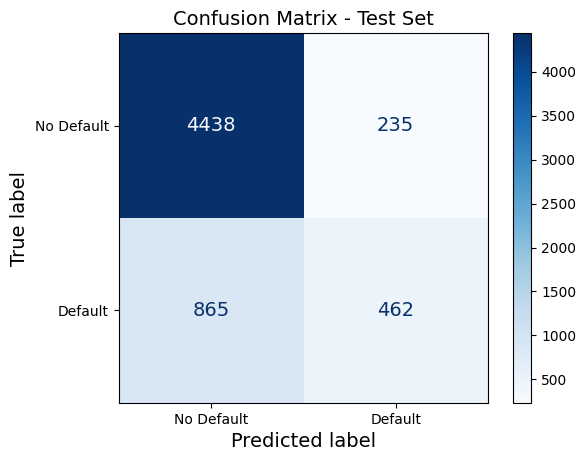

In [77]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test_ravel, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Default', 'Default']
)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()